# User response to new feature in app - Machine Learning Project

In this project our aim is to identify if a user will respond to the new feature of the app. To achieve this we have implemented following techniques/algorithms:

- Exploratory Data Analysis

### Classification Algorithms:

- Support Vector Machines (SVM)
- Decision Trees
- Boosting Techniques
- Artificial Neural Networks
- K Nearest Neighbors

### Clustering Algorithms:

- K-Means
- Expectation Maximization (EM)

Implemented Neural Networks On K-Means and EM clustering results as features and class labels as output

### Feature Engineering:

- Decision Tree feature selection algorithm
- PCA
- ICA
- Randomized Projections

Implemented clustering algorithms, K-Means and EM on the selected features from above results

Implemented Neural Networks on the selected features from above results

# Results

- SVM performed btter because our data is linearly seperable and hence suited for SVM
- Data represents consumer behavior, KNN finds users most similar to each other and hence suited for the given problem statement

### Comparison within Neural Networks Using only Clusters as Input
ANN model trained just on the clusters from k-means didn't perform well whereas the ANN trained on the clusters from EM did a good job in classifying 'True Positive' responses by the user. This makes sense as soft clustering would better describe the data given it's nature.

### Comparison within Neural Networks Using only Reduced Dimensions as Input
All the ANN performed well after dimentionality reduction with true positive rate of over 86% for every learner.
The best performing one was randomized projections for this problem with a TPR of about 89%

In [ ]:
#set the Path Directory
import os
os.chdir('C:\Users\Arun\Desktop\Projects')

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Data scaling and splits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Learners
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn import linear_model
from sklearn import tree,preprocessing

# Feature selection and dimensionality reduction
from sklearn.decomposition import FastICA, PCA
from sklearn import random_projection

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.feature_selection import SelectFromModel

from scipy.stats import kurtosis, skew

import itertools

from IPython.display import Image

import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Mobile App Feature Dataset

Below is the data description. Our aim is to identify if a user will respond to the new feature of the app.

- seller_id: ID of the seller, just like a row number
- user_status: Internal status of the user
- days_since_joined: The number of days since the user registered
- total_orders: The number of orders placed by the user since joining
- total_order_value: The total monetary value of all orders placed by the user since joining
- total_listings: The number of items listed on poshmark by the user since joining
- total_followers: The number of other users following this user as of now
- total_brands_shown: The unique number of brands shown within all listings created by the user
- total_categories_shown: The unique number of categories (handbags, shirts, etc.) shown within all listings created by the user
- current_listings_shown: The number of items listed as of now
- current_brands_shown: The unique number of brands shown within the current listings
- current_categories_shown: The unique number of categories shown within the current listings
- total_follows: The number of users that this user is following
- total_int_shares: Total items shared within the app by the user
- total_ext_shares: Total items shared to an external site (Facebook, Instagram, etc.) by the user
- binary_response: Did the user respond to the new feature (1 - Yes, 0 - No). All information pulled right before this.

** Our objective is to classify the users who respond to the new feature correctly**

# Data Exploration

In [4]:
# Load data
df = pd.read_excel('mobile-app.xls')
d = df
df.head()
df.dtypes

seller_id                     int64
days_since_joined           float64
total_orders                float64
total_order_value           float64
total_listings              float64
total_followers             float64
total_brands_shown          float64
total_categories_shown      float64
current_listings_shown      float64
current_brands_shown        float64
current_categories_shown    float64
total_follows               float64
total_int_shares            float64
total_ext_shares            float64
binary_response               int64
dtype: object

In [5]:
# Let's describe the dataset
df.describe()

,seller_id,days_since_joined,total_orders,total_order_value,total_listings,total_followers,total_brands_shown,total_categories_shown,current_listings_shown,current_brands_shown,current_categories_shown,total_follows,total_int_shares,total_ext_shares,binary_response
count,5749.00000,5740.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5558.000000,5558.000000,5558.000000,5718.000000,5718.000000,5718.000000,5749.000000
mean,2875.00000,976.040941,566.155467,730.504136,1039.176706,7549.127786,305.732068,34.342618,299.742533,58.046599,21.941886,250.639909,43.812522,0.816894,0.395547
std,1659.73768,512.521728,789.427827,1543.338765,1093.568142,9336.172000,261.327233,6.999387,282.668876,54.922683,6.530176,949.959874,51.631908,2.135570,0.489010
min,1.00000,11.000000,4.000000,1.400000,17.000000,160.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,1438.00000,556.000000,191.000000,177.287500,438.000000,3205.000000,124.000000,30.000000,120.000000,17.000000,18.000000,11.000000,0.000000,0.000000,0.000000
50%,2875.00000,865.000000,347.000000,365.730000,743.500000,5180.000000,240.500000,34.000000,243.000000,44.000000,23.000000,23.000000,30.000000,0.000000,0.000000
75%,4312.00000,1414.000000,670.000000,751.250000,1263.000000,8740.000000,410.000000,40.000000,380.000000,84.000000,26.000000,107.000000,60.000000,0.000000,1.000000
max,5749.00000,2392.000000,19716.000000,46226.590000,15517.000000,234465.000000,3550.000000,50.000000,4930.000000,808.000000,38.000000,39490.000000,630.000000,33.000000,1.000000


In [6]:
# Handling Null values

## Delete the latest user (the last entry of the dataframe) as all the predictive attributes are null in that row
df = df[df['seller_id'] != 5749]

## Since data frame is sorted in decreasing order of days_since_joined, let's alot nearest value of days_since_joined for missing values
df['days_since_joined'] = df['days_since_joined'].interpolate(method='nearest')

## We drop the null value for current_listings_shown, current_brands_shown, current_categories_shown, total_follows, total_int_shares, total_ext_shares
## as they are only 3.7% of the remaining dataset

df = df.dropna()
del df['seller_id']
d = df

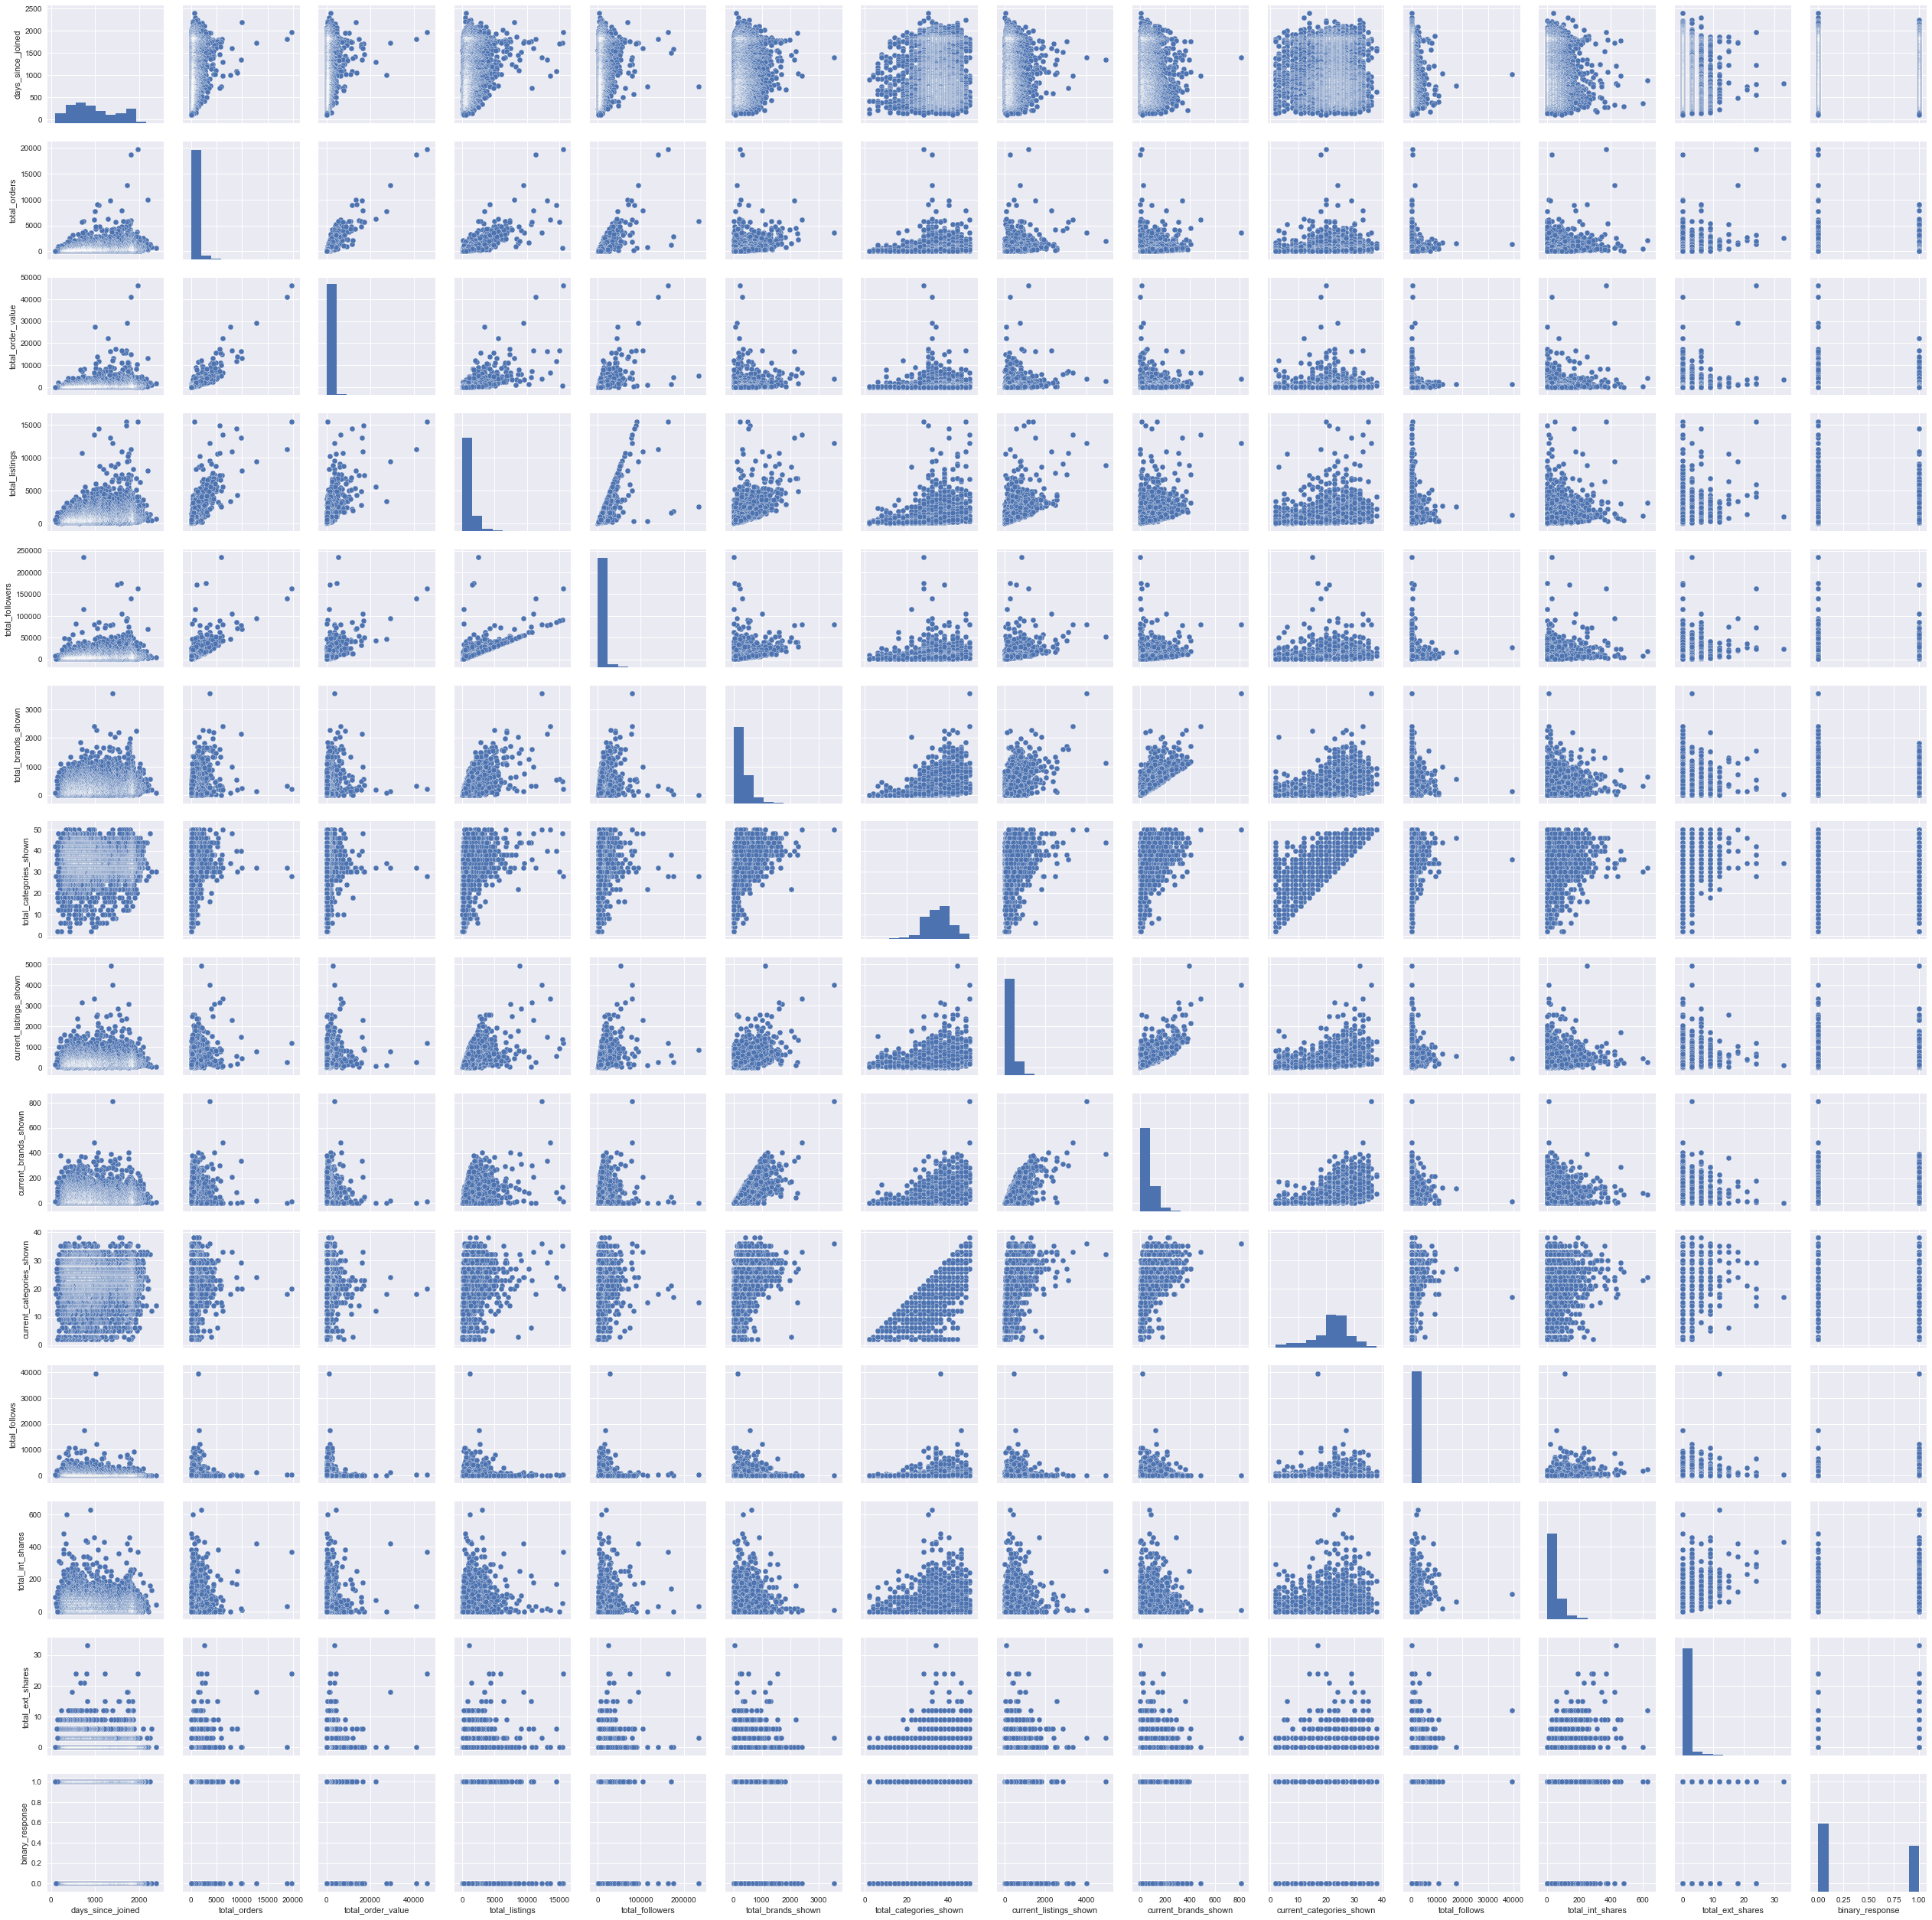

In [7]:
sns.pairplot(df)

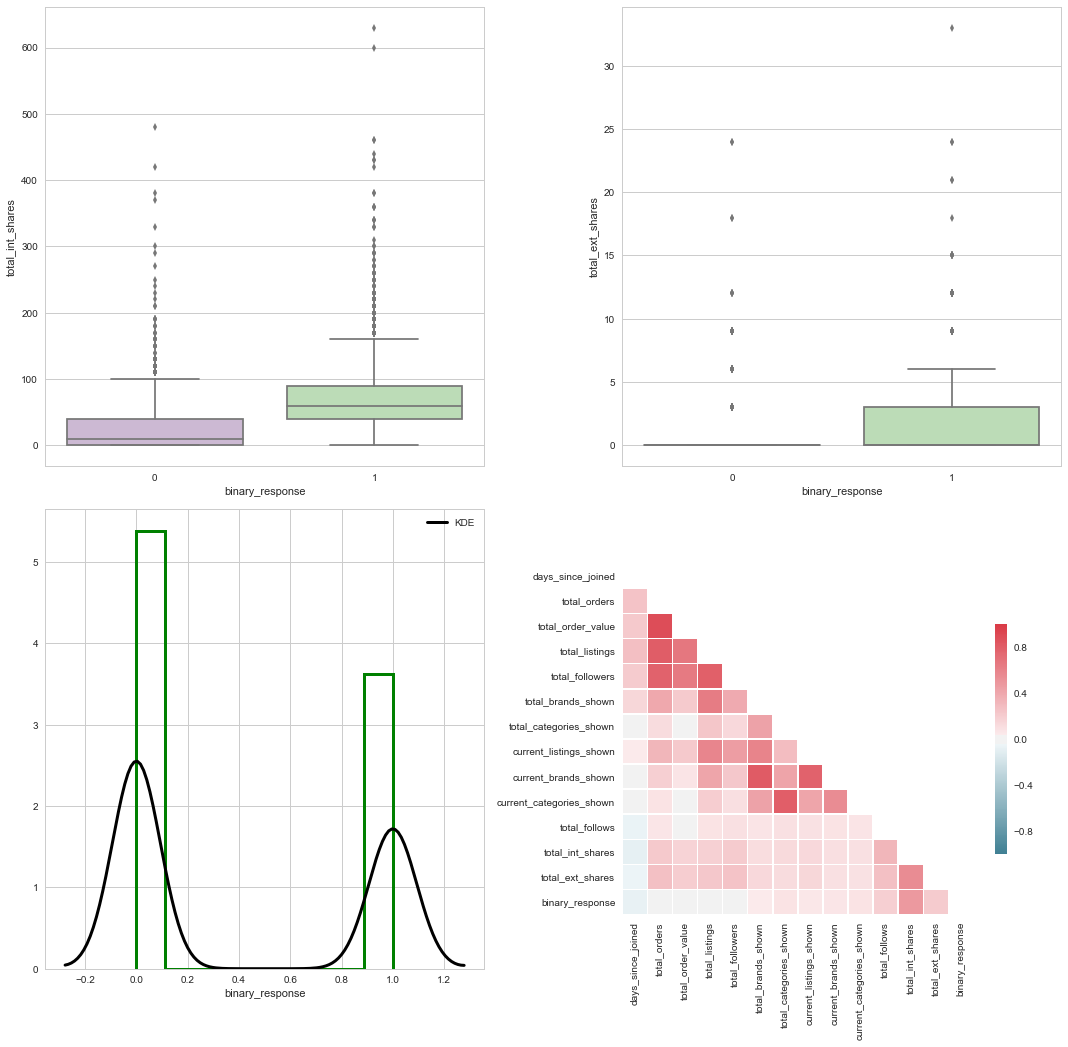

In [8]:
# Since our aim is to find if user responded to the new feature or not, let's see their covariance.
sns.set(style="whitegrid")

d = df
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.boxplot(y=df['total_int_shares'], x = df['binary_response'], palette="PRGn", ax = axes[0, 0])
sns.boxplot(y=df['total_ext_shares'], x = df['binary_response'], palette="PRGn", ax = axes[0, 1])

sns.distplot(df['binary_response'], kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"}, ax = axes[1, 0])


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = axes[1, 1])

plt.tight_layout()

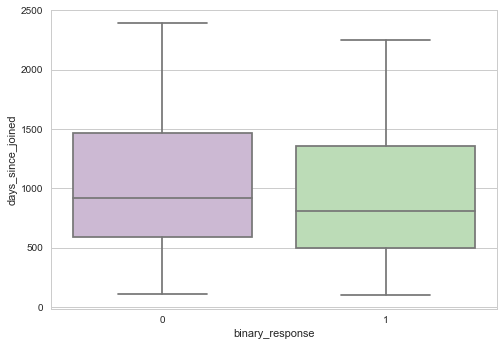

In [9]:
sns.boxplot(y=df['days_since_joined'], x = df['binary_response'], palette="PRGn")

- From the above pairplot and correlation plot, we can see that thte data is poorly correlated.
- Although newer users respond more new feature, it's a big factor as oldusers are receptive as well
- Number of data points for class 1 is 75% of that of class 0
- Users with more internal share have responded more to the new feature

# Classification Models

In [10]:
scaler = MinMaxScaler()
scaler.fit(df)
df =np.array(scaler.transform(df))

cols = df.shape[1]                                                         #Number of columns
df_X = df[:,0:cols-1]                                                      #Filter independent variables
df_y = df[:,cols-1:cols]

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.25, random_state = 5555)

# Support Vector Machines

Let's plot the learning curve using model complexity (i.e. type of kernel) for the SVM

ValueError: could not convert string to float: linear

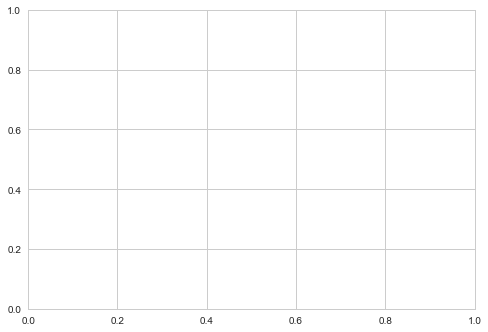

In [11]:
kernel = ['linear', 'poly', 'rbf']
error_test = []
error_train = []

for i in range(0, len(kernel)):
    clf_svc = svm.SVC(kernel = kernel[i], random_state = 121)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))


sns.set(style="whitegrid")


plt.plot(kernel, error_test)
plt.plot(kernel, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

*Linear kernel seem to have the least error, hence let's go ahead with the linear kernel*

In [12]:
clf_svc = svm.SVC(kernel = 'linear', random_state = 121)
clf_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=121, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[724 122]
 [201 336]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.37  0.63]]


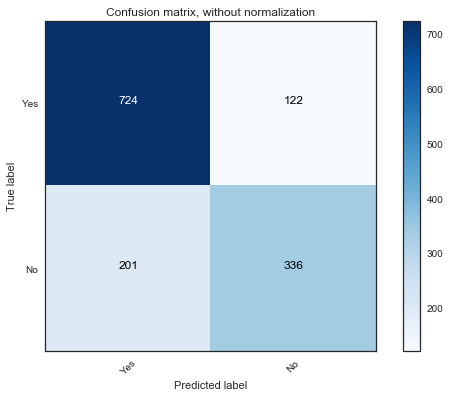

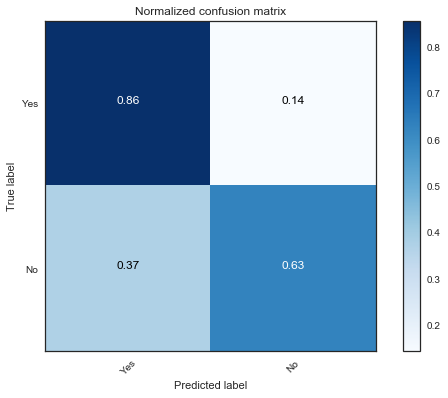

In [13]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = clf_svc.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

*According to the above confusion matrix, we are able to predict true yes 86% of the time. This is a good accuracy given that our object is to identify true positives!*

# Decision Tree

For thee decision trees, let's start with the learning curve using the depth of the trees.

We will use this curve to prune the tree as we do not want any overfiiting!

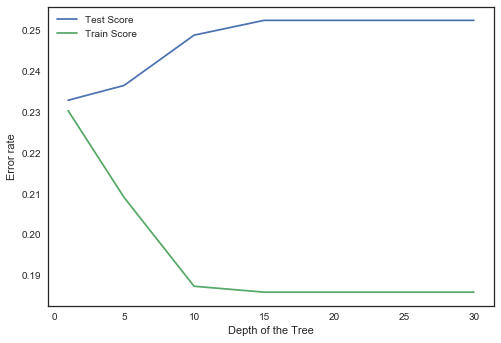

In [14]:
depths = [1, 5, 10, 15, 20, 22, 24, 26, 28, 30]
error_test = []
error_train = []

for i in range(0, len(depths)):
    dtree = DecisionTreeClassifier(max_depth = depths[i], min_samples_split = 50, min_samples_leaf = 20, random_state = 221) # minimum 50 samples required to split the node
    dtree = dtree.fit(X_train, y_train)
    
    error_test.append(zero_one_loss(y_test, dtree.predict(X_test)))
    error_train.append(zero_one_loss(y_train, dtree.predict(X_train)))

plt.plot(depths, error_test)
plt.plot(depths, error_train)

plt.xlabel('Depth of the Tree')
plt.ylabel('Error rate')
plt.legend(['Test Score', 'Train Score'])

Let's decide on depth of tree = 2

Prunning is done using the learning curve (above) using the depths of the tree and error rate

In [34]:
dtree = DecisionTreeClassifier(max_depth = 2, min_samples_split = 50, min_samples_leaf = 20, random_state = 221)
dtree = dtree.fit(X_train, y_train)

tree.export_graphviz(dtree, out_file='dtree1.dot')

# Due to issue in python anaconda environment, we used below command line to convert '.dot' file into .png image of the tree
# cmd line (working directory): dot -Tpng dtree.dot -o dtree.png

In [38]:
Image('dtree1.png')

Confusion matrix, without normalization
[[623 223]
 [ 99 438]]
Normalized confusion matrix
[[ 0.74  0.26]
 [ 0.18  0.82]]


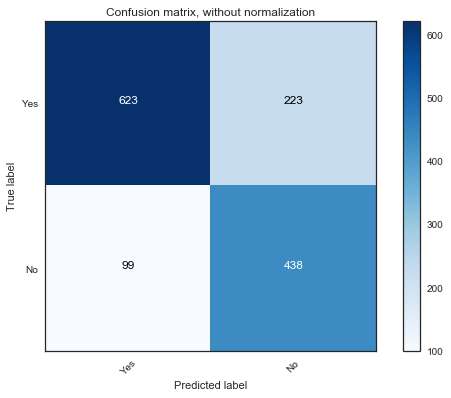

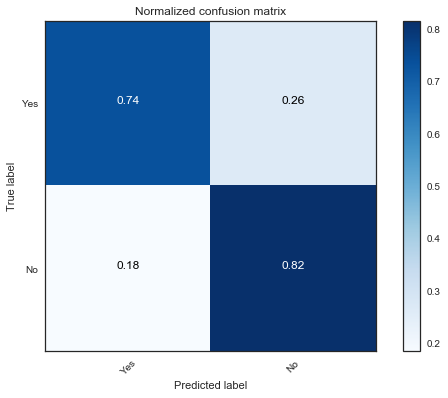

In [39]:
# sns.set_style('white')

## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = dtree.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

74% true positives predicted. Not bad, but SVM was better.

# AdaBoost

Excerpt from scikit learn:

*An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.*

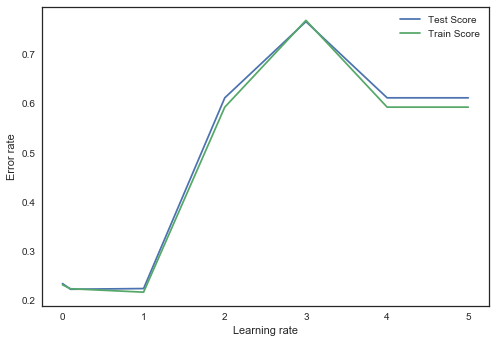

In [40]:
learning_rate = [0.001, 0.1, 1, 2, 3, 4, 5]
error_test = []
error_train = []

for i in range(0, len(learning_rate)):
    clf_ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = learning_rate[i], random_state = 321)
    clf_ada = clf_ada.fit(X_train, y_train)
    
    error_test.append(zero_one_loss(y_test, clf_ada.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_ada.predict(X_train)))
    
    

sns.set(style="white")

plt.plot(learning_rate, error_test)
plt.plot(learning_rate, error_train)

plt.xlabel('Learning rate')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

*Default learning rate of 1 is the providing the best results.*

In [41]:
clf_ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = 1, random_state = 321)
clf_ada =  clf_ada.fit(X_train, y_train)

print('F1 is {}%'.format(round(f1_score(y_test, clf_ada.predict(X_test))*100, 2)))
print('Error rate is {}%'.format(round(zero_one_loss(y_test, clf_ada.predict(X_test)), 2)))

F1 is 72.1%
Error rate is 0.22%


Confusion matrix, without normalization
[[677 169]
 [139 398]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.26  0.74]]


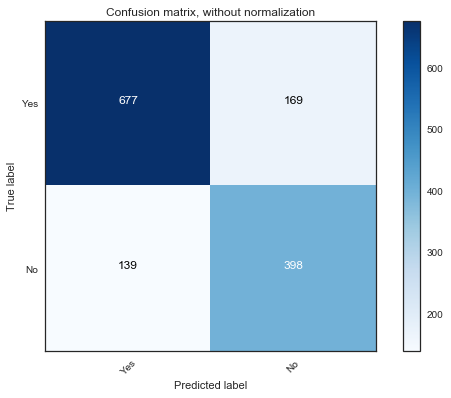

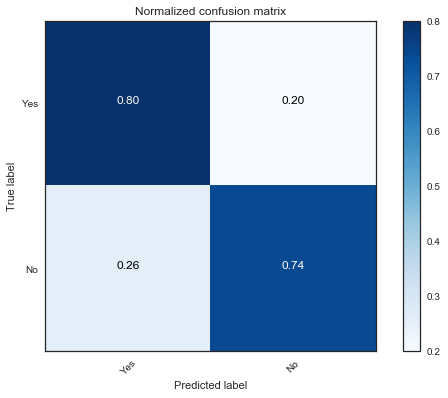

In [42]:
## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = clf_ada.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

80% Yes identifies correctly.

So far, SVM has the best results followed by the adaboost and third one is decision trees.

A point to note here is that adaboost uses decision trees as a classfier.

# Model Comparisons using Learning Curves

Let's build learning curves to see if our models are baised or have high variance issue. At the same time pick the best model.

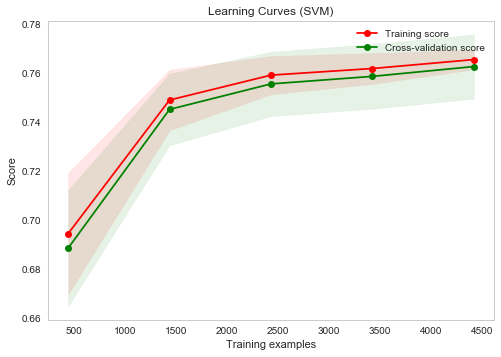

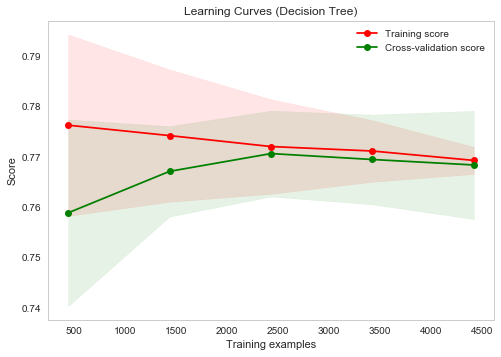

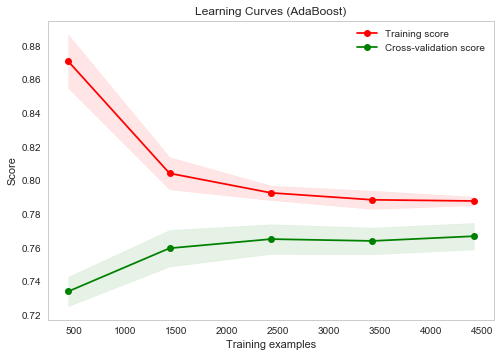

In [43]:
sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = df_X, df_y


title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = svm.SVC(kernel = 'linear', random_state = 121)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (Decision Tree)"
#SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2)#, random_state=0)
estimator = DecisionTreeClassifier(max_depth = 2, min_samples_split = 50, min_samples_leaf = 20, random_state = 221)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (AdaBoost)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = 1, random_state = 321)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


plt.show()

SVM is the best model out the given 3 for this data set because of the following reasons:
- Decision trees and adaboost have high variance, as sample size increases error decreases is the evidence for the same
- SVM has the best test accuracy

*Cross validation helped us in finding the bias/variance problem as well as finding the tradeoff point.*

# Neural Networks

Learning curves to experiment with layer sizes, nodes and activation function.

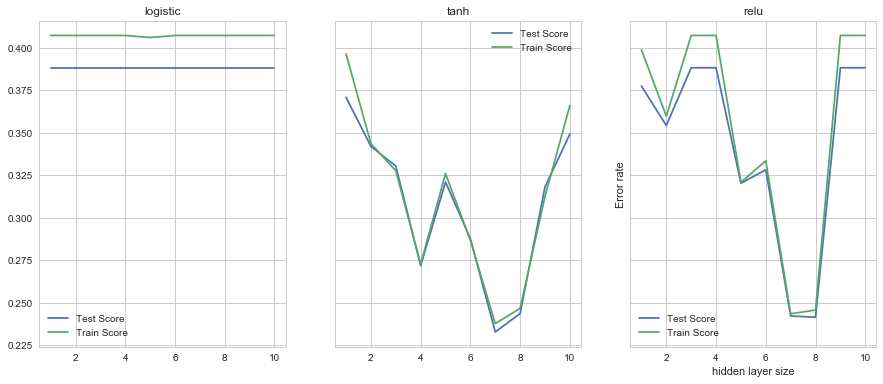

In [44]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state=424216)
    
        mlp.fit(X_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

The best model seems to be with Tanh activation function and 3 layers of 10, 5 and 5 nodes each.
Let's use cross validation and plot a learning curve between sample size and error to find out the presence of bias or variance!

**Cross Validation**

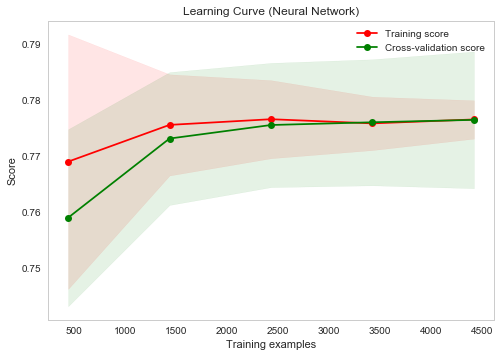

In [45]:
sns.set(style="whitegrid")

X, y = df_X, df_y


title = "Learning Curve (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23732)

estimator = MLPClassifier(hidden_layer_sizes=(10,5,5), activation = 'tanh', tol=1e-4, random_state=424216)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

From the above chart, we can conclude the absence of high variance as score doesn't really improve much as we increase the training set.  
Model is also not very biased.

In [46]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(10,5,5), activation = 'tanh', tol=1e-4, random_state=424216)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=424216,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Confusion matrix, without normalization
[[695 151]
 [158 379]]
Normalized confusion matrix
[[ 0.82  0.18]
 [ 0.29  0.71]]


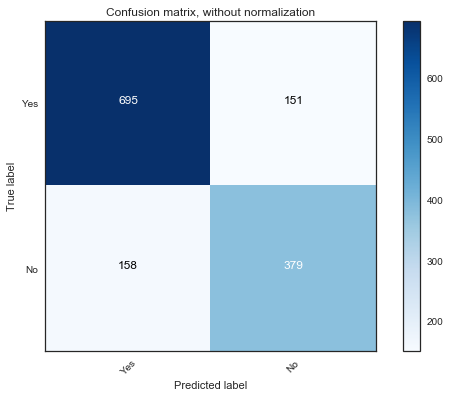

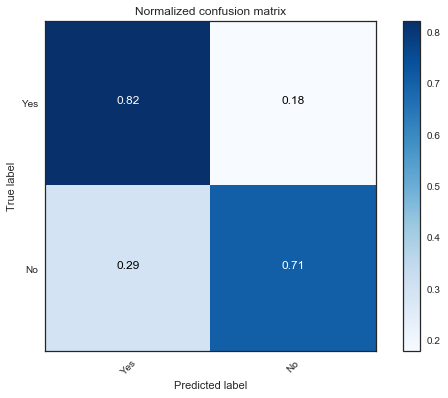

In [47]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = mlp.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Model is well generalized after the experimentation with layer sizes and activation function.  
True positive rate can be improved by experimenting with the features.

# KNN
We will use **euclidean distance** as this problem requires to find users similar to each other. Each user is represented by a vector of features, hence euclidean distance is suitable.

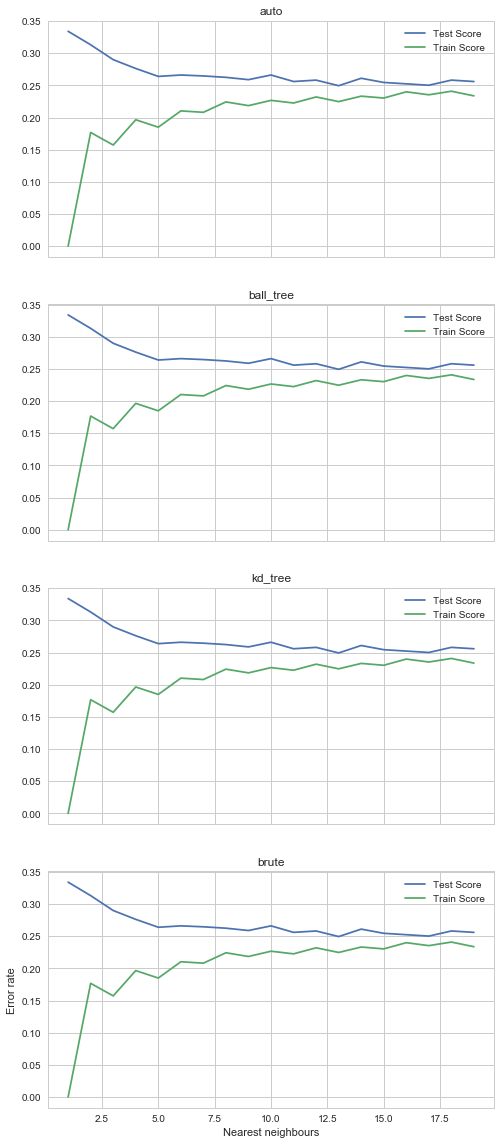

In [48]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(4,1, figsize=(8, 20), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

kvalue = range(1,20,1)
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
    
for k in range(0, len(algo)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(kvalue)):
        knn = KNeighborsClassifier(n_neighbors= kvalue[i], algorithm = algo[k], p=2)
        knn.fit(X_train, y_train)

        error_test.append(zero_one_loss(y_test, knn.predict(X_test)))
        error_train.append(zero_one_loss(y_train, knn.predict(X_train)))

    
    
    
    axs[k].plot(kvalue, error_test)
    axs[k].plot(kvalue, error_train)

    axs[k].set_title(algo[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("Nearest neighbours")
plt.ylabel("Error rate")

So all the algorithms are performing similarly.  
Now we have to decide on the trade off between bias and variance.  
For this purpose, we will do cross validation using k=5 and k=10

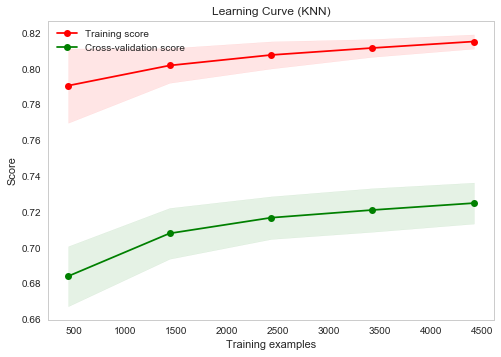

In [49]:
sns.set(style="whitegrid")

X, y = df_X, df_y


title = "Learning Curve (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23732)

estimator = KNeighborsClassifier(n_neighbors= 5, p=2)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

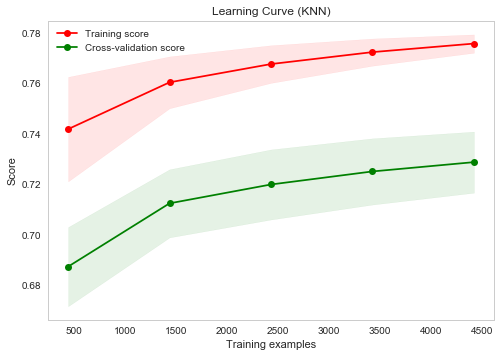

In [50]:
sns.set(style="whitegrid")

X, y = df_X, df_y


title = "Learning Curve (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23732)

estimator = KNeighborsClassifier(n_neighbors= 10, p=2)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

k = 5 has higher variance than k=10 but k=10 gives us better trade-off between variance and bias, hence generalizing in a better way.

In [51]:
knn = KNeighborsClassifier(n_neighbors= 10, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Confusion matrix, without normalization
[[737 109]
 [259 278]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.48  0.52]]


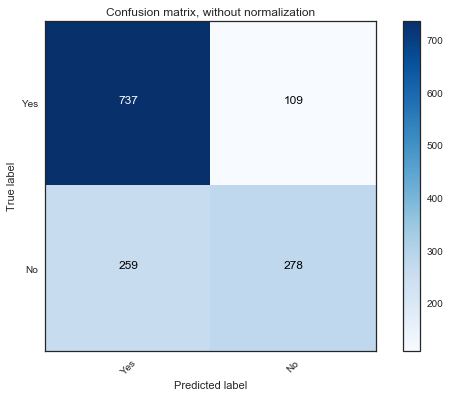

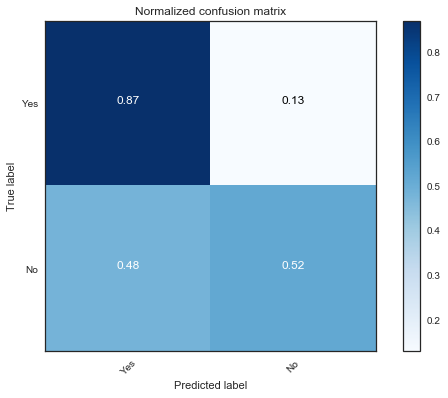

In [52]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = knn.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Comparison Between Various Algorithms

| **Algorithm**       | **True Positive Rate** |
|---------------------|------------------------|
| SVM                 | 0.86                   |
| Decision Tree       | 0.74                   |
| Boosting (AdaBoost) | 0.80                   |
| Neural Network      | 0.82                   |
| KNN                 | 0.87                   |

Our top performing algorithm till now has been KNN and SVM. They outperform other algorithms because of the following reasons:  
- Our data is linearly seperable nd hence suited for SVM  
- Data represents consumer behavior, KNN finds users most similar to each other and hence suited for the given problem statement

# K Means

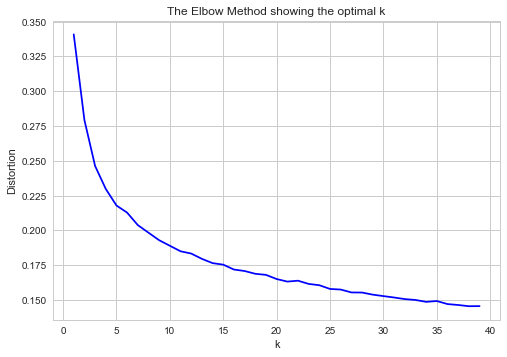

In [53]:
# k means determine k
distortions = []
K = range(1,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Elbow is not clear but can be approximated around k = 8

('For n_clusters =', 8, 'The average silhouette_score is :', 0.20057188458483488)


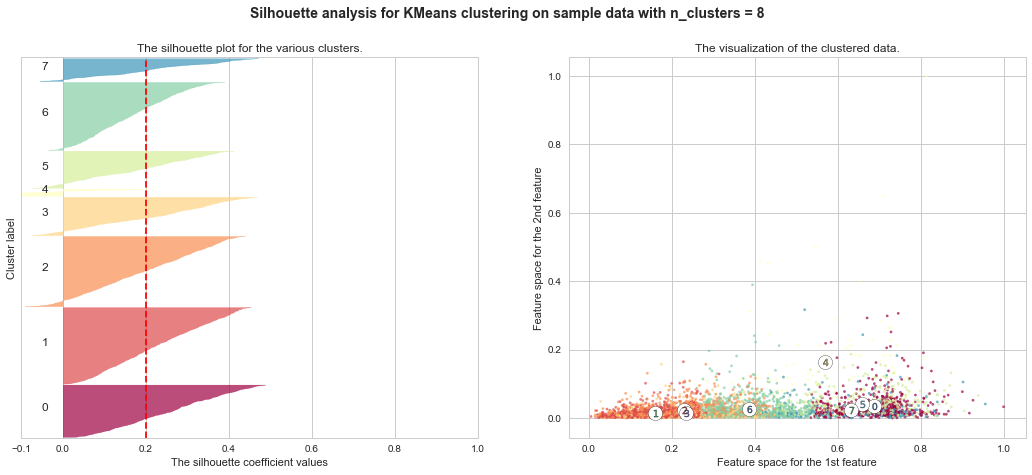

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

sns.set(style="whitegrid")

def plot_cluster(n_clusters, X):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=6)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

plot_cluster(8, X_train)

In [55]:
# Traing k-means
kmeans = KMeans(n_clusters = 8, random_state = 7)
kmeans.fit(X_train, y_train)

y_pred_kmeans_train = kmeans.predict(X_train)
y_pred_kmeans_test = kmeans.predict(X_test)

# Expectation Maximization
Using Gaussian mixtures

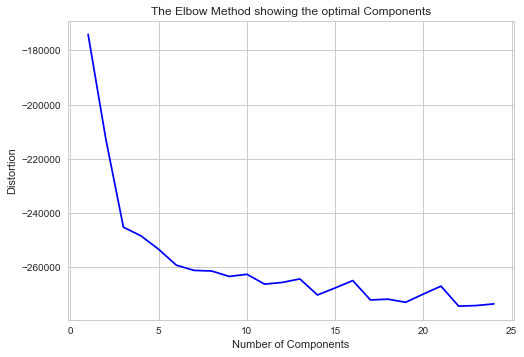

In [56]:
aic = []
K = range(1,25)
for k in K:
    gmm = mixture.GaussianMixture(n_components = k).fit(X_train)
    gmm.fit(X_train)
    aic.append(gmm.aic(X_train))

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, aic, 'bx-')
plt.xlabel('Number of Components')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal Components')
plt.show()

This is a nice elbow plot!  
We can identify optimal number of components to be 4

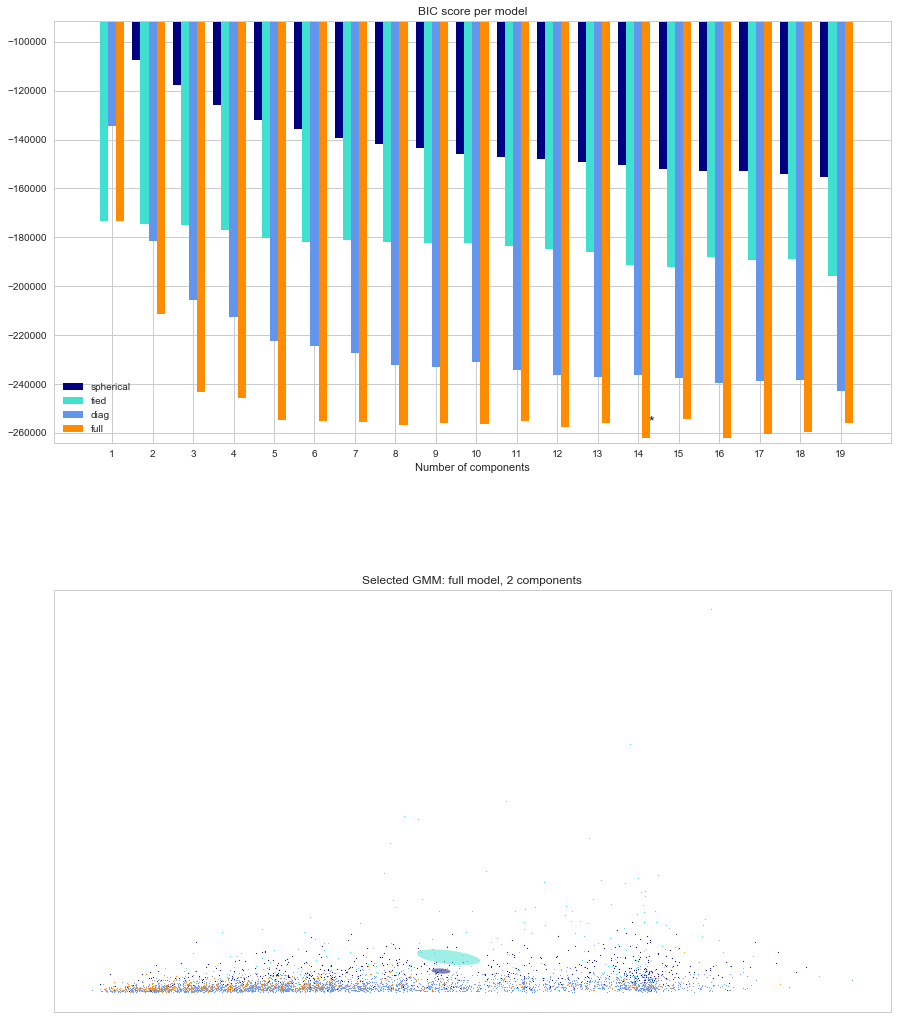

In [78]:
from scipy import linalg
import matplotlib as mpl

def EM_BIC(X, spl):
    C = np.array([[0., -0.1], [1.7, .4]])
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 20)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)


def EM_win(X, splot, clf):
    # Plot the winner
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()

X = X_train
np.random.seed(7)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
clf.fit(X)
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

Above graph also indicate that optimal no. of components is 4. Although clusters don't seem to be well seperated, which fine since expectation maximization is a sof clustering algorithm

In [60]:
# Traing EM
gmm = mixture.GaussianMixture(n_components = 4, random_state = 7)
gmm.fit(X_train, y_train)

y_pred_gmm_train = gmm.predict(X_train)
y_pred_gmm_test = gmm.predict(X_test)

# Comparison

We got 8 clusters through k-means clustering whereas 4 clusters in soft clustering using expectation maximization  
K-means clusters are not intact as well as not well seperated and hence not desirable

# Feature Engineering & Dimensionality Reduction

# Feature selection based on decision tree

In [61]:
cols = df.shape[1]                                                         #Number of columns

X, y = df_X, df_y
clf =  DecisionTreeClassifier(max_depth = 10, random_state = 7)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
print(df.shape)

(5530L, 1L)
(5530L, 14L)


We used decision tree with tree depth of 10, in return only one dimension came out to be important.

In [62]:
#Train and test splits
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X_new,df_y,test_size=0.3, random_state = 7)

## We will classify anything more than 3rd quartile as high shares##
#y_train = np.where(y_train > np.median(y_train), 1, 0)                   #For logistic regression
#y_test = np.where(y_test > np.median(y_train), 1, 0)                     #For logistic regression

y_train_dt = np.array(y_train_dt).flatten()                                    #For linear regression
y_test_dt = np.array(y_test_dt).flatten()                                      #For linear regression

print(X_train_dt.shape)
print(y_train_dt.shape)
print(X_test_dt.shape)
print(y_test_dt.shape)

(3871L, 1L)
(3871L,)
(1659L, 1L)
(1659L,)


## Principal Component Analysis

[<matplotlib.text.Text at 0x2bf1bdd8>, <matplotlib.text.Text at 0x297d8048>]

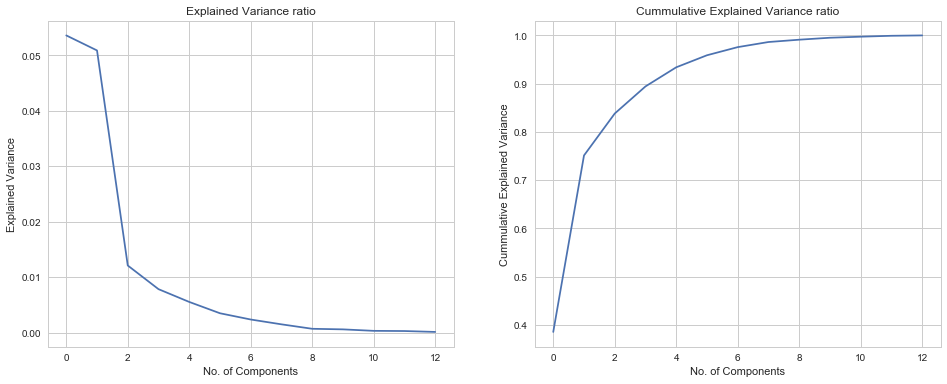

In [63]:
pca = PCA(random_state = 7)
pca.fit(X_train)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# PCA plot
ax[0].plot(pca.explained_variance_)
ax[0].set_title('Explained Variance ratio')
ax[0].set(xlabel='No. of Components', ylabel='Explained Variance')

# Cummulative variance explained
ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_title('Cummulative Explained Variance ratio')
ax[1].set(xlabel='No. of Components', ylabel='Cummulative Explained Variance')

In [64]:
pca = PCA(n_components = 4, random_state = 7)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.fit_transform(X_test, y_test)

We are going to select the elbow of inverted plot of cummulative explained variance, that is no. of components = 4

## Independent Component Analysis

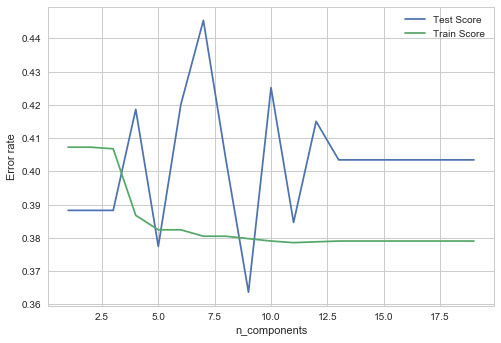

In [65]:
n_components = range(1,20,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ica = FastICA(n_components = n_components[i], whiten = True, random_state=7)
    X_train_ica = ica.fit_transform(X_train, y_train)
    X_test_ica = ica.fit_transform(X_test, y_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ica, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ica)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ica)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

There is a lot of variance in the test error but if we look at the test and train together then we can **identify no. of components to be 4**

In [66]:
ica = FastICA(n_components = 4, whiten = True, random_state = 7)
X_train_ica = ica.fit_transform(X_train, y_train)
X_test_ica = ica.fit_transform(X_test, y_test)

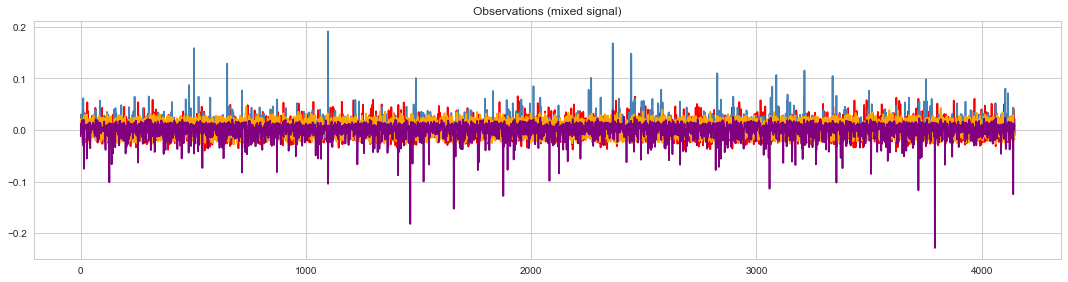

In [67]:
# Compute ICA
S_ = ica.fit_transform(X_train)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

plt.figure(figsize = (15, 15))

models = [S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange', 'purple']#, 'grey', 'skyblue', 'black', 'pink', 'green', 'lightgreen']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

Above plot shows the distribution of 
4 signals.  
Clearly they are overlapping, but independent as it is the defining property of ICA

## Randomized Projections

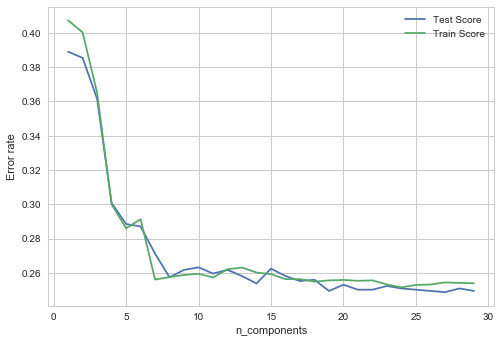

In [68]:
n_components = range(1,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ra = random_projection.GaussianRandomProjection(n_components = n_components[i], random_state=7)
    X_train_ra = ra.fit_transform(X_train)
    X_test_ra = ra.fit_transform(X_test, y_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ra, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ra)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ra)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

We use forward selection to calculate best value foroptimal no. of components fro randome projections.  
As you can see, **optimal no. of components is 8 as depicted by the elbow in the above plot**

In [69]:
ra = random_projection.GaussianRandomProjection(n_components = 8, random_state = 7)
ra.fit(X_train)
X_train_ra = ra.fit_transform(X_train)
X_test_ra = ra.fit_transform(X_test, y_test)

# Comparison
1) Decision tree results in dimensionality reduction by selecting only one feature  
2) PCA has reduction to 4 components explaining most of the variance  
3) Through ICA, we are able to seperate out 4 independent seignals  
4) Randome projections results in 8 components which is greater that both ICA and PCA but it also successfully explains the correlations between the features

# Clustering post Dimentionality Reduction

# K-Means
## Using Decision Tree Results

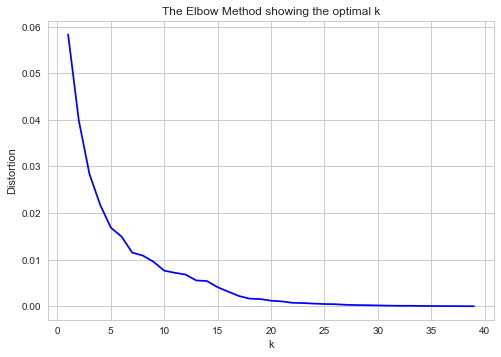

In [70]:
# k means determine k
distortions = []
K = range(1,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_dt)
    kmeanModel.fit(X_train_dt)
    distortions.append(sum(np.min(cdist(X_train_dt, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_dt.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can see a clear elbow at 10 clusters, hence let's decide on **10 clusters**

## Using PCA Results

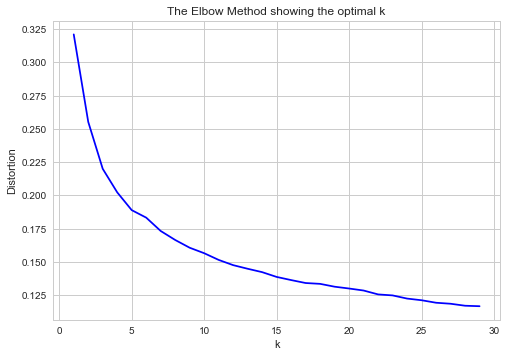

In [71]:
# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
    kmeanModel.fit(X_train_pca)
    distortions.append(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We'll go with **K = 12**, although elbow for this plot is not very clear

## Using ICA Results

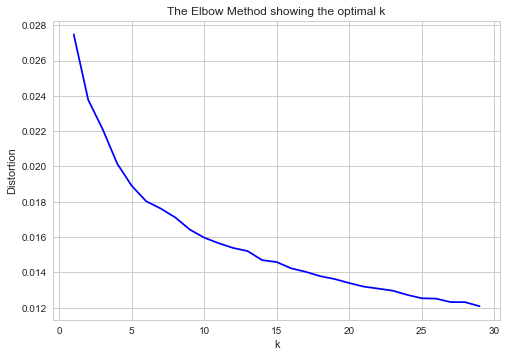

In [72]:
# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_ica)
    kmeanModel.fit(X_train_ica)
    distortions.append(sum(np.min(cdist(X_train_ica, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_ica.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As was the case earlier with PCA, elbow for ICA is again not clear.  
Based on our prior knowledge let's settle down to **10 components**

## Using Random Projections Results

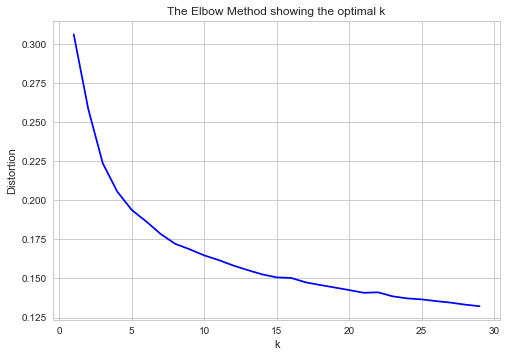

In [73]:
# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_ra)
    kmeanModel.fit(X_train_ra)
    distortions.append(sum(np.min(cdist(X_train_ra, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_ra.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Elbow is not clear, we will use **k=10 for random projections**

# Expectation Maximization
## Using Decision Tree Results

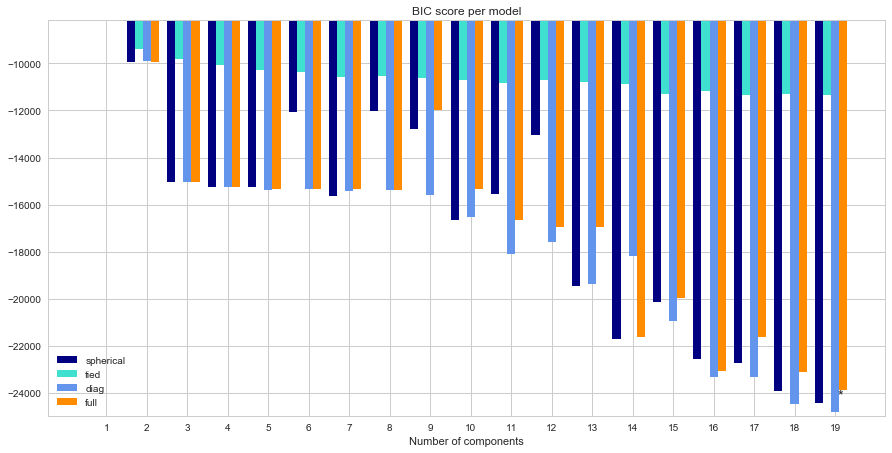

In [74]:
X = X_train_dt
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

We will use 11 components

## Using PCA Results

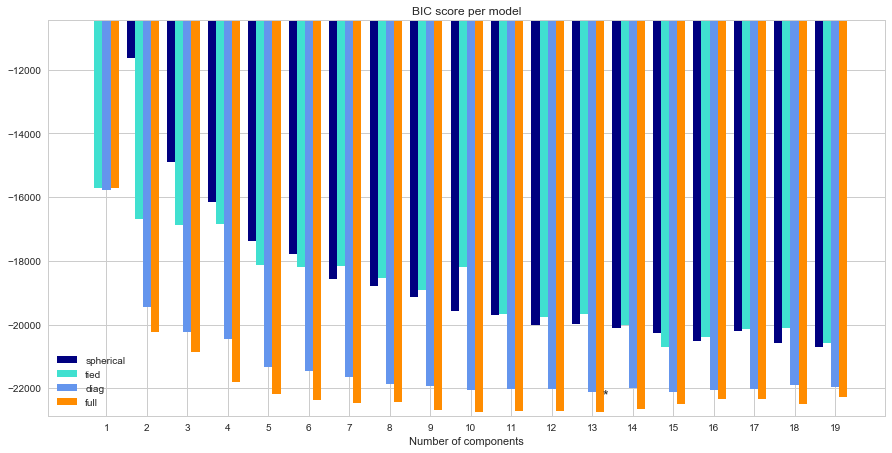

In [79]:
X = X_train_pca
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

5 components seem to be best choice as slope decreases very slightly after that

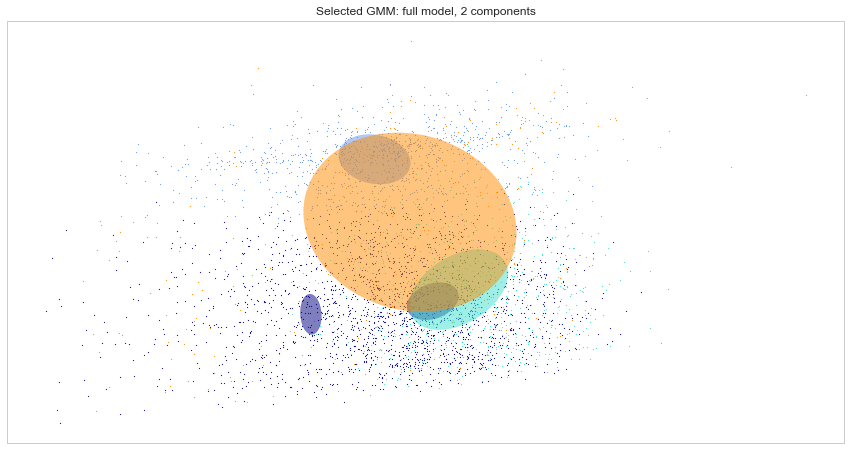

In [80]:
clf = mixture.GaussianMixture(n_components = 5, covariance_type='full')
clf.fit(X)
plt.figure(figsize = (15,16))
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

Above graph vizualizes 5 clusters obtained through expectation maximization on the data after dimensionality reduction using PCA

## Using ICA Results

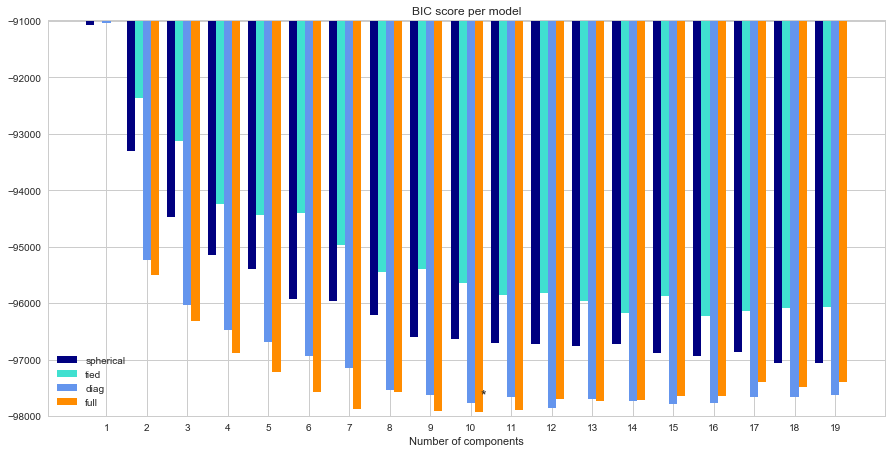

In [81]:
X = X_train_ica
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

Best choice for no. of clusters is 5 and incremental decrease in BIC score is very low after 5 clusters

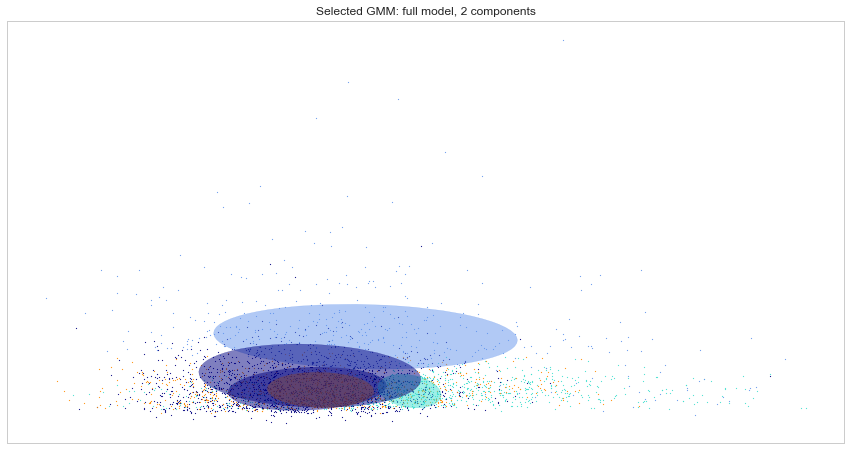

In [82]:
clf = mixture.GaussianMixture(n_components = 5, covariance_type='full')
clf.fit(X)
plt.figure(figsize = (15,16))
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

## Using Random Projections Results

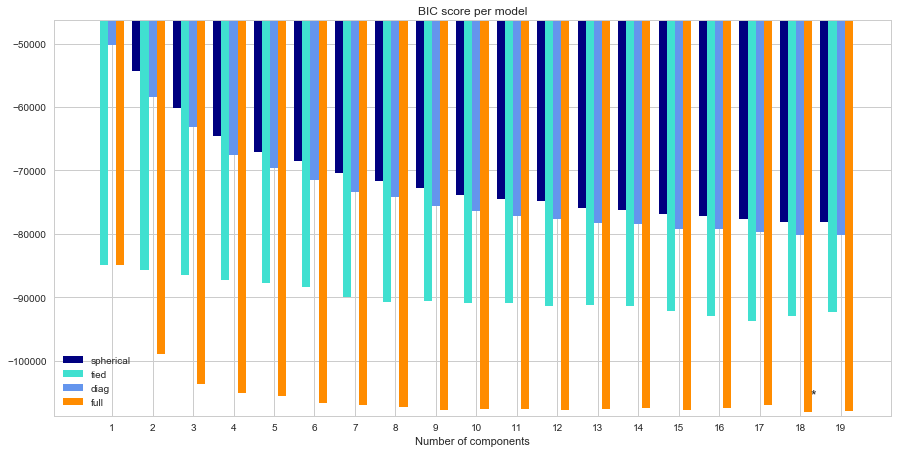

In [83]:
X = X_train_ra
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

BIC decreases very slightly ater 4 clusters, hence k = 4

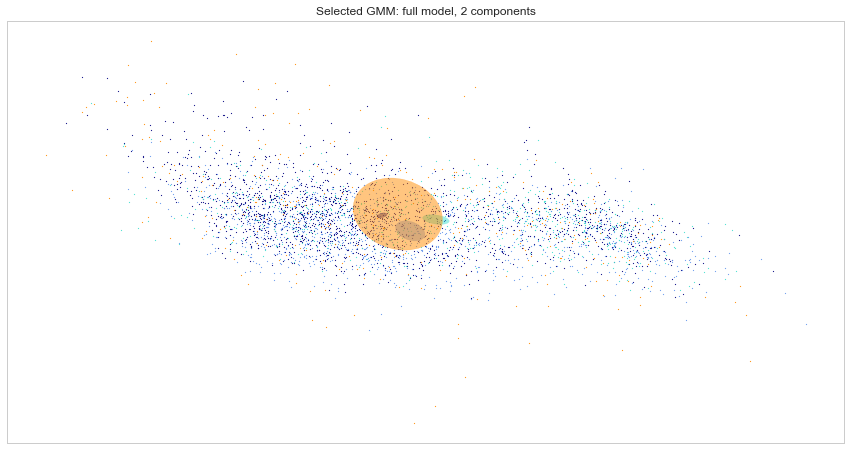

In [84]:
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
clf.fit(X)
plt.figure(figsize = (15,16))
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

Above graph vizualizes 4 clusters obtained through expectation maximization on the data after dimensionality reduction using random projections

# Neural Netwroks after Dimensionality Reduction
## Using results from DT

In [85]:
# check train shape
X_train_dt.shape

(3871L, 1L)

In [86]:
y_train_dt.shape

(3871L,)

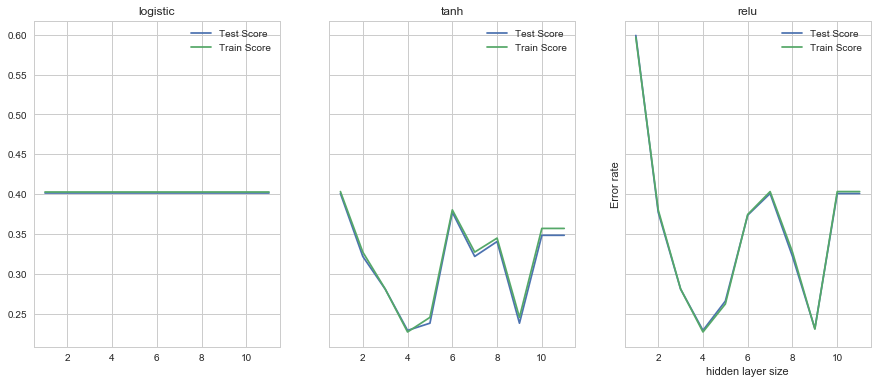

In [87]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]

activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_dt, y_train_dt)

        error_test.append(zero_one_loss(y_test_dt, mlp.predict(X_test_dt)))
        error_train.append(zero_one_loss(y_train_dt, mlp.predict(X_train_dt)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10, 11], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10, 11], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

Neural network with 3 layers with node sizes of 35, 25, and 15 perform the best with ReLU activation function.

In [88]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15), activation = 'relu', tol=1e-4, random_state = 7)
mlp.fit(X_train_dt, y_train_dt)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[818 176]
 [204 461]]


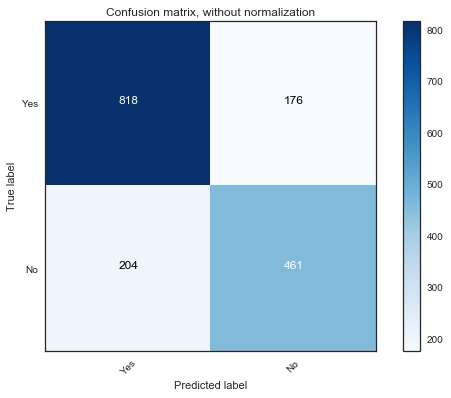

In [89]:
sns.set_style('white')

## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = mlp.predict(X_test_dt)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_dt, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Since our objective is to identify number of high likes correctly, this model does a good job by predicting 818 cases correctly.  
Hence a **True Positive Rate of 82.29%**

## Using Results from PCA

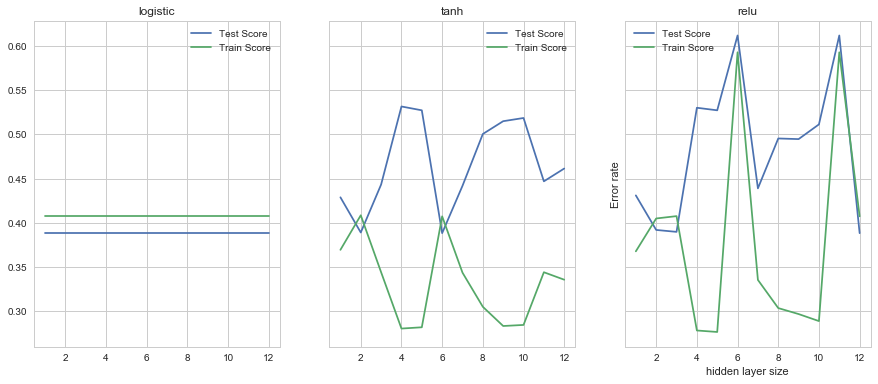

In [90]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_pca, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test_pca)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train_pca)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

Neural network with 4 layers with node sizes of 35, 25, 15 and 5 perform the best with ReLU activation function.

In [91]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'relu', tol=1e-4, random_state = 7)
mlp.fit(X_train_pca, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[390 456]
 [305 232]]


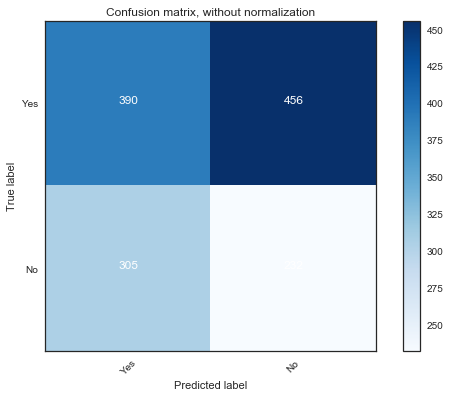

In [92]:
sns.set_style('white')

## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = mlp.predict(X_test_pca)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Since our objective is to identify number of high likes correctly, this model does a good job by predicting 818 cases correctly.  
Hence a **True Positive Rate of 81.6%**

## Using Results from ICA

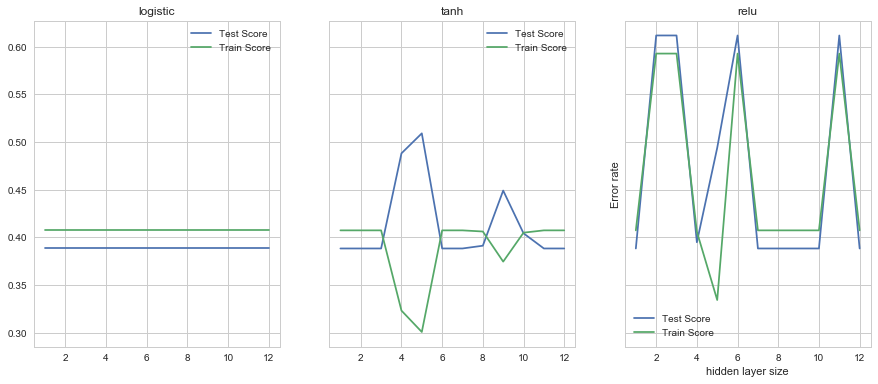

In [94]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_ica, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test_ica)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train_ica)))

 
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

Neural network with 4 layers with node sizes of 35, 25, 15 and 5 perform the best with tanh activation function.

In [95]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'tanh', tol=1e-4, random_state = 7)
mlp.fit(X_train_ica, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[538 308]
 [350 187]]


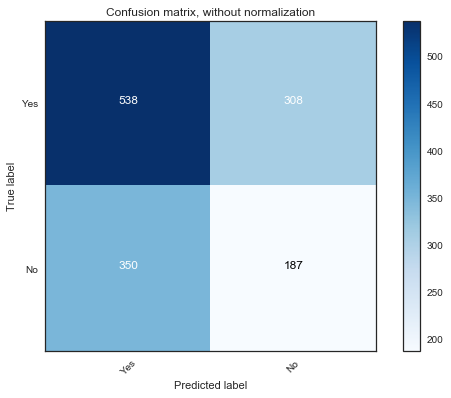

In [96]:
sns.set_style('white')

## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = mlp.predict(X_test_ica)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Since our objective is to identify number of high likes correctly, this model does a good job by predicting 665 cases correctly.  
Hence a **True Positive Rate of 83.26%**

## Using Results from Random Projections

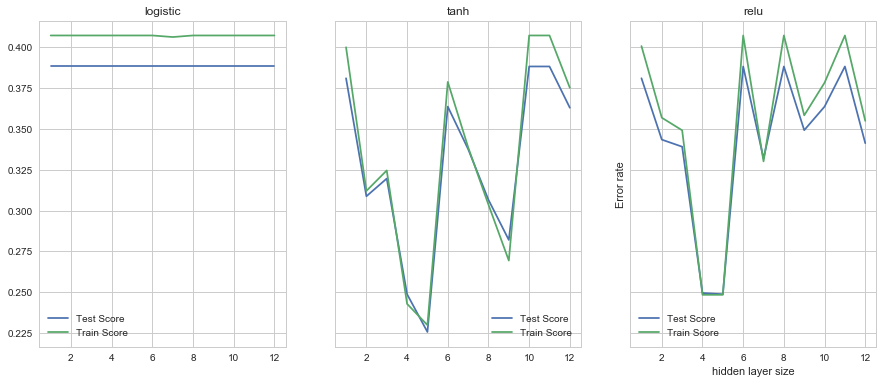

In [97]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_ra, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test_ra)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train_ra)))

    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

Neural network with 4 layers with node sizes of 35, 25, 15 and 5 perform the best with tanh activation function.

In [98]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'tanh', tol=1e-4, random_state = 7)
mlp.fit(X_train_ra, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[732 114]
 [213 324]]


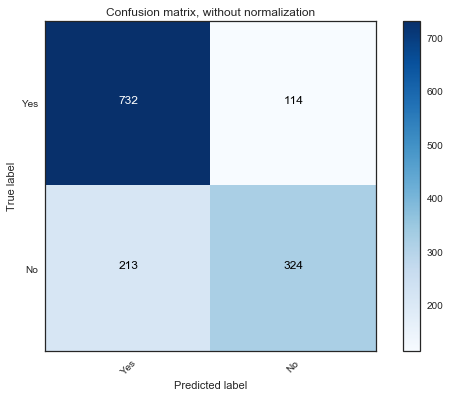

In [99]:
sns.set_style('white')

## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = mlp.predict(X_test_ra)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Since our objective is to identify number of high likes correctly, this model does a best job by predicting 665 cases correctly.  
Hence a **True Positive Rate of 86.48%**

# Neural Network Using Clusters of Task 1
## Using K means clusters

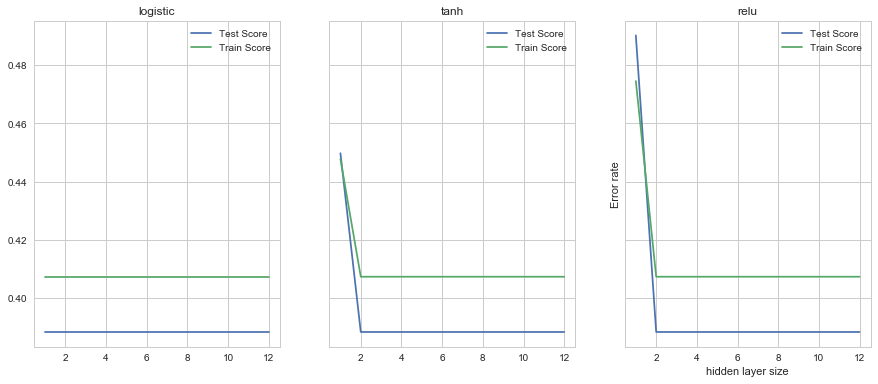

In [100]:
y_pred_kmeans_train = y_pred_kmeans_train.reshape(-1,1)
y_pred_kmeans_test = y_pred_kmeans_test.reshape(-1,1)

sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(y_pred_kmeans_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(y_pred_kmeans_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(y_pred_kmeans_train)))

      
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

Neural network with 4 layers with node sizes of 35, 25, 15 and 5 perform the best with sigmoid activation function.

In [101]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'logistic', tol=1e-4, random_state = 7)
mlp.fit(y_pred_kmeans_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[846   0]
 [537   0]]


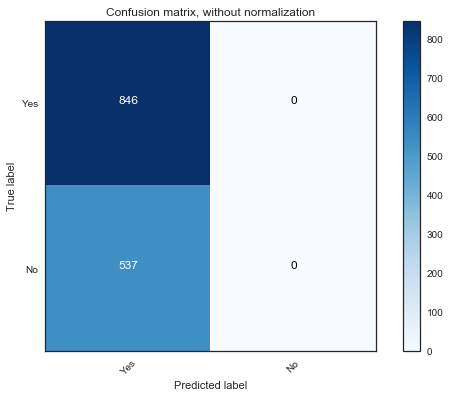

In [102]:
sns.set_style('white')

## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = mlp.predict(y_pred_kmeans_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

This is not a good learner. All the classifications are marked as 'Yes' (1) if we use only one feature (i.e. just cluster id) as input.

## Using Expectation Maximization Clusters

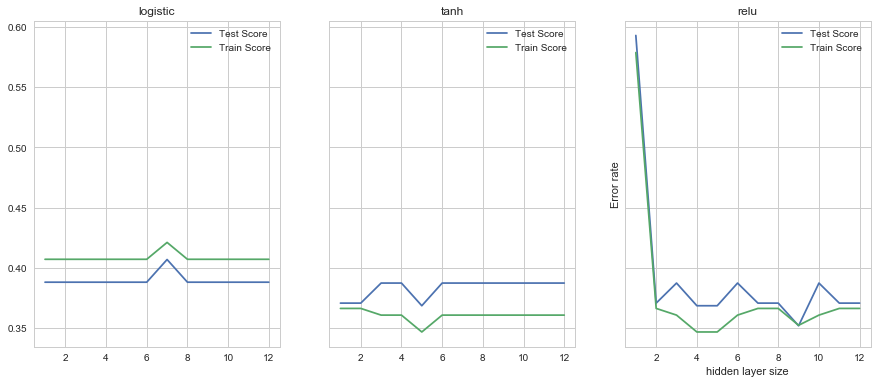

In [103]:
y_pred_gmm_train = y_pred_gmm_train.reshape(-1,1)
y_pred_gmm_test = y_pred_gmm_test.reshape(-1,1)

sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(y_pred_gmm_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(y_pred_gmm_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(y_pred_gmm_train)))

      
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

Neural network with 4 layers with node sizes of 35, 25, 15 and 5 perform the best with ReLU activation function.

In [104]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'relu', tol=1e-4, random_state = 7)
mlp.fit(y_pred_gmm_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[642 204]
 [306 231]]


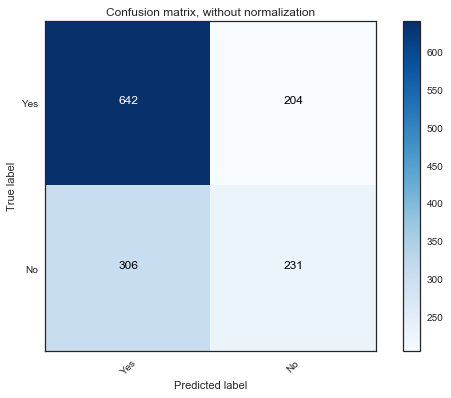

In [105]:
sns.set_style('white')

## Confusion Matrix

class_names = ['Yes', 'No']

y_pred = mlp.predict(y_pred_gmm_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Since our objective is to identify number of high likes correctly, this model does a best job by predicting 706 cases correctly.  
Hence a **True Positive Rate of 88.36%**